## 1. Project Overview

This project examines the Titanic dataset to understand what factors affected passenger survival.

The main goal is to explore the data, visualize important patterns, find possible predictors, and prepare the dataset for modeling.

The dataset includes information about passengers such as their personal details, ticket information, and whether they survived.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load Titanic dataset
titanic_data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Display dataset dimensions
titanic_data.shape


(891, 12)

 The shape shown above represents the number of rows (passengers) and columns (features) available for analysis.


## 2. Exploratory Data Analysis (EDA)

This section provides an initial look at the Titanic dataset to understand its structure, examine missing values, and summarize basic statistics.  
It highlights key features, potential data quality issues, and patterns that may help explain passenger survival.


In [ ]:
from IPython.display import display

# Preview dataset, check missing values, compute statistics, and overall survival rate
display(titanic_data.head())
display(titanic_data.isna().sum())
display(titanic_data.describe())
display(titanic_data['Survived'].mean())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


np.float64(0.3838383838383838)

**Observations from the Titanic Dataset:**

The dataset includes passenger details such as personal information, ticket data, and survival status.

Some columns, especially Age, have missing values that will need to be handled later.

Summary statistics give a quick view of important numerical features like age, fare, and family size.

About 38% of passengers survived, which shows that most did not survive the disaster.

These early observations help prepare for deeper analysis and finding patterns that may affect survival.


## 3. Data Visualization – Survival Patterns

This section visualizes patterns in passenger survival based on gender and ticket class.  
These plots help identify which groups were more likely to survive.


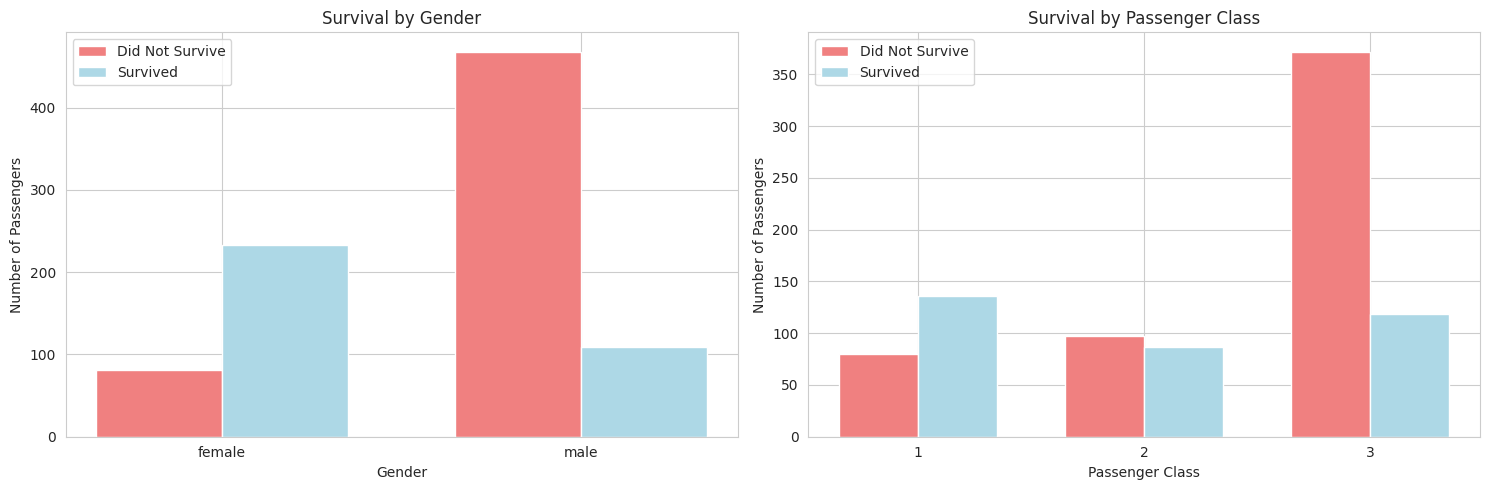

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,5))

# 1. Survival by Gender
plt.subplot(1,2,1)
gender_survival = pd.crosstab(titanic_data['Sex'], titanic_data['Survived'])
x = np.arange(len(gender_survival))
width = 0.35

plt.bar(x - width/2, gender_survival[0], width, label='Did Not Survive', color='lightcoral')
plt.bar(x + width/2, gender_survival[1], width, label='Survived', color='lightblue')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.xticks(x, gender_survival.index)
plt.legend()

# 2. Survival by Passenger Class
plt.subplot(1,2,2)
class_survival = pd.crosstab(titanic_data['Pclass'], titanic_data['Survived'])
x = np.arange(len(class_survival))

plt.bar(x - width/2, class_survival[0], width, label='Did Not Survive', color='lightcoral')
plt.bar(x + width/2, class_survival[1], width, label='Survived', color='lightblue')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(x, class_survival.index)
plt.legend()

plt.tight_layout()
plt.show()


**Observations from Visualizations:**

- Gender: Females had a much higher survival rate than males.  
- Passenger Class: First-class passengers were more likely to survive than second- and third-class passengers.  
- Overall: Gender and class appear to be strong predictors of survival and will be important features in future modeling.


## 4. Data Visualization – Age Distribution Analysis

This section examines the age distribution of Titanic passengers, comparing survivors and non-survivors.  
It helps identify whether age played a role in survival patterns.


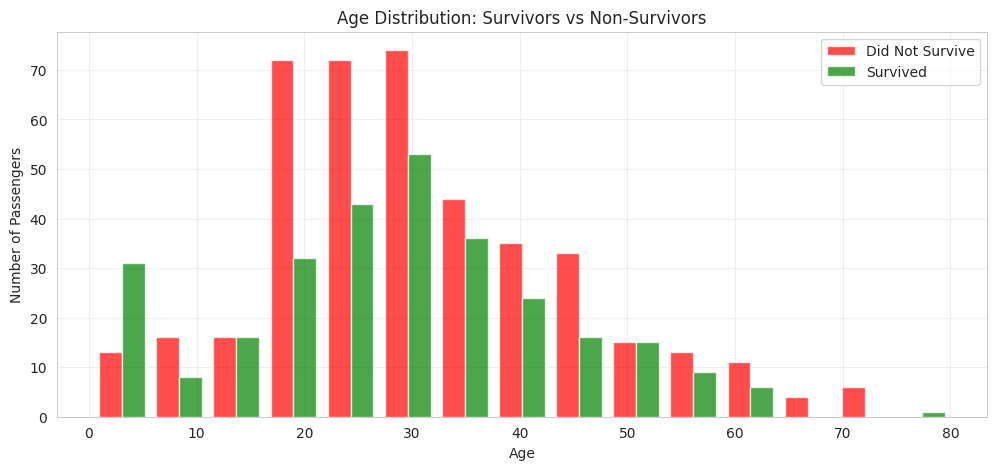

In [ ]:
# Drop missing ages
age_data = titanic_data.dropna(subset=['Age'])

# Define colors and labels
colors = ['red', 'green']
labels = ['Did Not Survive', 'Survived']

# Plot histogram
plt.figure(figsize=(12,5))
plt.hist(
    [age_data.query('Survived == 0')['Age'], age_data.query('Survived == 1')['Age']],
    bins=15, alpha=0.7, color=colors, label=labels
)
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Age Statistics by Survival:**

- **Did Not Survive:** Mean age is approximately 30.6 years  
- **Survived:** Mean age is approximately 28.3 years  

**Observation:**

Passengers who survived were generally a bit younger on average, which suggests that age may have played a role in survival, especially for children and young adults.

## 5. Data Visualization – Feature Relationships

This section explores relationships between numerical features in the Titanic dataset, focusing on how they correlate with survival.  
A correlation heatmap helps identify potential predictors for modeling.


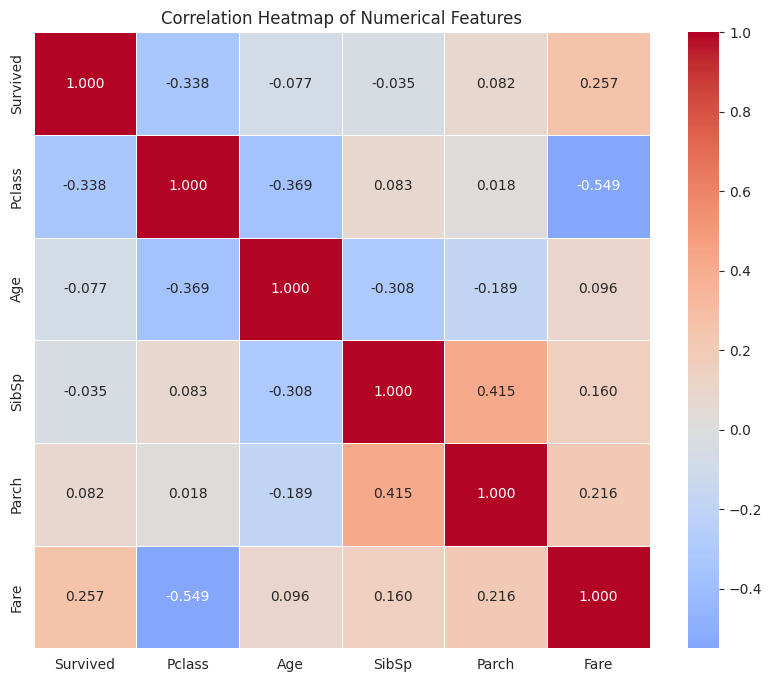

In [ ]:
# Data Visualization - Feature Relationships
plt.figure(figsize=(10, 8))

corr = titanic_data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Key Correlation Insights:**

**Fare vs Survival:** There is a positive relationship, meaning passengers who paid higher fares were more likely to survive.

**Pclass vs Survival:** There is a negative relationship, showing that passengers in first class had better survival chances than those in lower classes.

**Age vs Survival:** The relationship is weak, which suggests that age alone was not a strong factor in predicting survival.

These results show that ticket class and fare play an important role in survival predictions, while age has a smaller influence.


## Conclusions and Summary

**Data Overview:**

- Total passengers: 891  
- Overall survival rate: 38.4%  
- Missing data primarily in Age (19.9%) and Cabin (77.1%)  

**Survival Patterns:**

- Women survived far more often (74.2%) than men (18.9%)  
- First-class passengers had the highest survival rate (63%)  
- Younger passengers, especially children, had better outcomes  
- Higher fares were linked to better survival chances  

**Data Quality Notes:**

- Columns like Age, Cabin, and Embarked require cleaning before modeling  
- Overall, the dataset provides solid demographic and travel information  

**Next Steps:**

- Fill in missing Age and Embarked values  
- Convert Sex and Embarked to numerical form  
- Build a simple baseline model using key features  
- Test and compare different machine learning models  

This analysis provides a strong starting point for the next phase of the project.
